In [103]:
import os
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

plt.style.use('dark_background')
sns.set_context('notebook')
sns.set_palette('pastel')

In [123]:
input_df = pd.read_csv(os.path.join(os.path.dirname(os.getcwd())+'/preprocessed_data/classifier_input.csv'))
input_df.head()

,user_id,product_id,interactions,sessions,no_view,no_cart,no_remove_from_cart,no_purchase,avg_price,latest_price,price_change,tenure,day_of_week,lifetime_value,prev_1,prev_2,prev_3,event_type
0,2963072,5774240,2.0,1.0,1.0,1.0,0.0,0.0,39.67,39.67,0.0,0.0,6.0,0.0,4.0,2.5,2.0,0.0
1,480054310,5774240,1.0,1.0,0.0,1.0,0.0,0.0,39.67,39.67,0.0,0.0,6.0,0.0,4.0,2.5,2.0,-1.0
2,501725690,5774240,1.0,1.0,0.0,1.0,0.0,0.0,39.67,39.67,0.0,0.0,6.0,0.0,4.0,2.5,2.0,-1.0
3,590757444,5774240,2.0,1.0,0.0,2.0,0.0,0.0,39.67,39.67,0.0,0.0,6.0,0.0,4.0,2.5,2.0,-1.0
4,590950489,5774240,1.0,1.0,0.0,1.0,0.0,0.0,39.67,39.67,0.0,0.0,6.0,0.0,4.0,2.5,2.0,0.0


In [124]:
convert_dict = {
                'interactions':'int64',
                'sessions':'int64',
                'no_view':'int64',
                'no_cart':'int64',
                'no_remove_from_cart':'int64',
                'no_purchase':'int64',
                'tenure':'int64',
                'day_of_week':'category',
                'event_type':'category',
                }
input_df = input_df.astype(convert_dict)

In [131]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_trans = input_df.copy()
col_filter = [cols for cols in df_trans.columns if cols not in ['user_id','product_id','event_type','day_of_week']]
df_trans.loc[:,col_filter] = pt.fit_transform(df_trans[col_filter])
df_trans.head()

,user_id,product_id,interactions,sessions,no_view,no_cart,no_remove_from_cart,no_purchase,avg_price,latest_price,price_change,tenure,day_of_week,lifetime_value,prev_1,prev_2,prev_3,event_type
0,2963072,5774240,1.279028,-0.29109,1.839677,-0.383981,-0.247049,-0.106197,2.449544,2.449773,0.028367,-0.27664,6.0,-0.099301,-0.745335,-1.463417,-1.849115,0.0
1,480054310,5774240,-0.664254,-0.29109,-0.538840,-0.383981,-0.247049,-0.106197,2.449544,2.449773,0.028367,-0.27664,6.0,-0.099301,-0.745335,-1.463417,-1.849115,-1.0
2,501725690,5774240,-0.664254,-0.29109,-0.538840,-0.383981,-0.247049,-0.106197,2.449544,2.449773,0.028367,-0.27664,6.0,-0.099301,-0.745335,-1.463417,-1.849115,-1.0
3,590757444,5774240,1.279028,-0.29109,-0.538840,2.244803,-0.247049,-0.106197,2.449544,2.449773,0.028367,-0.27664,6.0,-0.099301,-0.745335,-1.463417,-1.849115,-1.0
4,590950489,5774240,-0.664254,-0.29109,-0.538840,-0.383981,-0.247049,-0.106197,2.449544,2.449773,0.028367,-0.27664,6.0,-0.099301,-0.745335,-1.463417,-1.849115,0.0


#### EDA

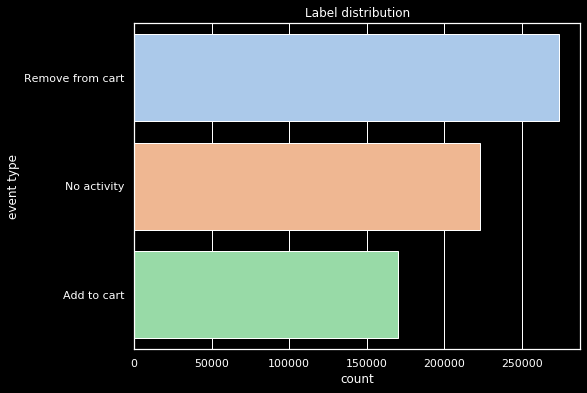

In [132]:
# label distribution
fig, ax = plt.subplots(figsize=(8,6))
a = sns.barplot(x='user_id', y='event_type', \
    data=input_df.groupby('event_type').user_id.count().reset_index(), \
    orient='h', ax=ax)
ax.set(title='Label distribution',xlabel='count', \
       ylabel='event type', \
       yticklabels=['Remove from cart','No activity','Add to cart'])
plt.show()

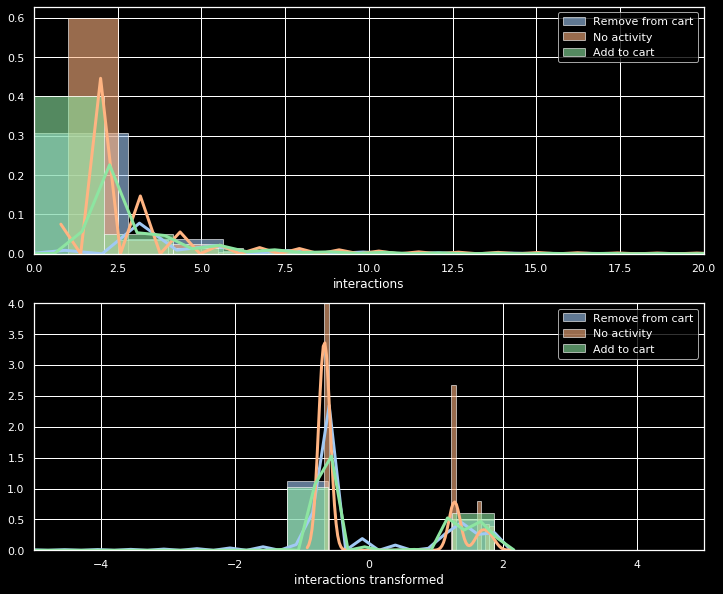

In [135]:
plt.close()
fig, ax = plt.subplots(2,1,figsize=(12,10))

sns.distplot(input_df.loc[input_df.event_type==-1,'interactions'],label='Remove from cart',hist_kws={'alpha':.6}, kde_kws={'linewidth':3}, ax=ax[0])
sns.distplot(input_df.loc[input_df.event_type==0,'interactions'],label='No activity',hist_kws={'alpha':.6}, kde_kws={'linewidth':3}, ax=ax[0])
sns.distplot(input_df.loc[input_df.event_type==1,'interactions'],label='Add to cart',hist_kws={'alpha':.6}, kde_kws={'linewidth':3}, ax=ax[0])
ax[0].set(xlim=(0,20),xlabel='interactions')
ax[0].legend()

sns.distplot(df_trans.loc[df_trans.event_type==-1,'interactions'],label='Remove from cart',hist_kws={'alpha':.6}, kde_kws={'linewidth':3}, ax=ax[1])
sns.distplot(df_trans.loc[df_trans.event_type==0,'interactions'],label='No activity',hist_kws={'alpha':.6}, kde_kws={'linewidth':3}, ax=ax[1])
sns.distplot(df_trans.loc[df_trans.event_type==1,'interactions'],label='Add to cart',hist_kws={'alpha':.6}, kde_kws={'linewidth':3}, ax=ax[1])
ax[1].set(xlim=(-5,5),ylim=(0,4),xlabel='interactions transformed')
ax[1].legend()
plt.show()